<a href="https://colab.research.google.com/github/Jahnavi-Jaolekar/Play-Store-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Problem Statement<b>
## <b>The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

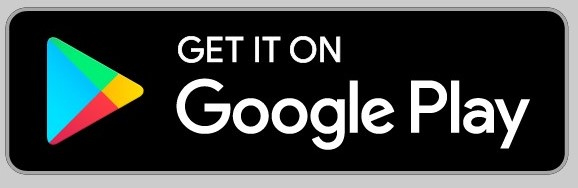

In [ ]:
Title_of_the_project= "abc"

In [ ]:
# Importing necessary libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## **Let's mount our data**

In [ ]:
# Mounting data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  We will be storing data in different variables namely data1 and data2.
## Once the drive in mounted, we just have to copy path of the saved data that we want to access by making a string and storing in a variable.
## later we can use pandas operations to project that dataframe in our colab file.

In [ ]:
# Storing data in separate variables
data1='/content/drive/MyDrive/capstone project/Copy of Play Store Data.csv'
data2='/content/drive/MyDrive/capstone project/Copy of User Reviews.csv'
play_store = pd.read_csv(data1)
user_review = pd.read_csv(data2)

In [ ]:
# Viewing playstore data
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Viewing user review data
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## **Determining number of rows and columns of play store data**

In [ ]:
# Determining the shape of play store data with the help of shape attribute of pandas.
# Here we have used indexing as the shape attribute returns a tuple of number of rows and columns respectively. 
print(f'number of rows:{play_store.shape[0]}')
print(f'number of columns:{play_store.shape[1]}')

number of rows:10841
number of columns:13


## **Determining number of rows and columns of user review data**

In [ ]:
# Determining the shape of user review data with the help of shape attribute of pandas.
# Here we have used indexing as the shape attribute returns a tuple of number of rows and columns respectively.
print(f'number of rows:{user_review.shape[0]}')
print(f'number of columns:{user_review.shape[1]}')

number of rows:64295
number of columns:5


## **Let's just dig into the data a bit more!!**


In [ ]:
# Columns is an attribute that returns column labels, which helps to understand which column contains what type of information.
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Similarly we will be finding out column labels for user review data as well .
user_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# Determining data type of data frame objects of play store data.
play_store_data_type= play_store.dtypes
print(play_store_data_type)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [ ]:
# Determining null values present in play_store data.
play_store_null_count = play_store.isnull().sum()
print(play_store_null_count)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [ ]:
# Determining unique values present in play store data.
play_store_unique_values = play_store.nunique()
print(play_store_unique_values)

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64








###*   This shows that this data contains ***1474*** null values in ***'Rating column'***, ***'Current Ver'*** has **8**, ***'Android Ver'*** has ***3***, ***'Content Rating'*** and  ***'Type'*** each have ***1*** null value.
### *   Only rating has numeric values in the form of floats.





In [ ]:
# Determining data type of data frame objects of user review data.
user_review_data_type = user_review.dtypes
print(user_review_data_type) 

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object


In [ ]:
# Determining null values present in user review data.
user_review_null_count = user_review.isnull().sum()
print(user_review_null_count)

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [ ]:
# Determining unique values present in user review data.
user_review_unique_values = user_review.nunique()
print(user_review_unique_values)

App                        1074
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         5410
Sentiment_Subjectivity     4474
dtype: int64






### *   This shows that user review data has ***26994*** null values in ***Translated Review***, ***Sentiment***, ***Sentiment Polarity, Sentiment Subjectivity***.







# **Dealing with null values in play store data**


*   It is very important to remove null values from the data as their prence might give you wrong intrpretation of data inturn leading to incorrect results
*   So how do we deal with null values?


> 1.   We either remove the entire row or column in which the null value is present if number of null values present are less or if data cannot be altered with other values.

> 2.   In our case as the values are int/float format we can use 'median' of the entire column to replace null values.

> 3.   In case of string objects 'mode' can also be used to replace null values.(depends on data if null values can be replaced with median or mode)
















In [ ]:
# Defining a function to calculate median for particular columns
def impute_median(series):
  return series.fillna(series.median)

In [ ]:
# Replacing null values in rating column with median of all values present in that column
play_store.Rating=play_store['Rating'].transform(impute_median)

In [ ]:
# Checking neighbouring rows wher null value has been found...
play_store.loc[10470:10475, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


## ***Presence of null value in 'Content Rating' is due to absence of one value from category column due to which every other value from adjascent columns have been shifted to neighbouring column. Therfore we have to remove this particular row itself inorder to remove null value as it cannot be replaced or changed***

In [ ]:
# Removal of the null value from Content Rating column
play_store.dropna(subset = ['Content Rating'], inplace=True)

In [ ]:
# Null values of type,Current Ver,Android Ver, columns are replaced with mode of respective columns.
# Mode is most recurring value of that particular column, so null values are being replaced by mode.
play_store['Type'].fillna(str(play_store['Type'].mode().values[0]),inplace=True)
play_store['Current Ver'].fillna(str(play_store['Current Ver'].mode().values[0]),inplace=True)
play_store['Android Ver'].fillna(str(play_store['Android Ver'].mode().values[0]),inplace=True)

In [ ]:
# Check if still null values are present
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# **Dealing with null values in user review data**

In [ ]:
# Replacing null values in Sentiment Polarity column with median of all values present in that column
user_review.Sentiment_Polarity=user_review['Sentiment_Polarity'].transform(impute_median)

In [ ]:
# Replacing null values in Sentiment Subjectivity column with median of all values present in that column
user_review.Sentiment_Subjectivity=user_review['Sentiment_Subjectivity'].transform(impute_median)

In [ ]:
# Null values of Sentiment are replaced with mode of that column.
user_review['Sentiment'].fillna(str(user_review['Sentiment'].mode().values[0]),inplace=True)

In [ ]:
# Removal of null values of Translated Review column
user_review.dropna(subset=['Translated_Review'],inplace=True)

**Why did we remove null values of this particular column?**


> *As you can see that one translated review contains review of users (string), now you can say strings can be replaced by mode of that column as we did earlier but in this case we cannot replace with 'mode' as there might be more number of review on on a particular category of app(for eg: food).
So  lets say if game category app has null value and if we replace it with 'mode' then it will replace it with review of food category app which returns irrelevant data and will interfere with results and interpretation.*

In [ ]:
# Check if still null values are present
user_review.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

# **Now let's check for duplicate values in play store data**

In [ ]:
#Presence of duplicate values, if any...
print("Number of Unique App Names=",len(play_store['App'].unique()))
print("Number of total app Name=",play_store.shape[0])
print("Duplicate apps=",len(play_store['App'])-len(play_store['App'].unique()))

Number of Unique App Names= 9659
Number of total app Name= 10840
Duplicate apps= 1181


In [ ]:
#Examining the appearence of Duplicate values
play_store[play_store['App'] == 'Coloring book moana']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
play_store.drop_duplicates(subset='App',keep='first',inplace=True)
play_store.shape

(9659, 13)

# **Now let's check for duplicate values in user review data**

In [ ]:
#Presence of duplicate values, if any...
print("Number of Unique App Names=",len(user_review['App'].unique()))
print("Number of total app Name=",user_review.shape[0])
print("Duplicate apps=",len(user_review['App'])-len(user_review['App'].unique()))

Number of Unique App Names= 865
Number of total app Name= 37427
Duplicate apps= 36562


## ***Since one app can have 'n' number of reviews, so there are chances that data might be repeated or considered as duplicate. Therefore duplicate items in this data will not be removed or cleaned*** 

# **What is to be cleaned?**

### *   Reviews: It has to be a numerical column and datatype into int/float

### *   Size: Every Entry has "M" and "K" which needs to be removed and datatype into int/float
### *   Installs: Every entry has "+" at the end which needs to be removed and datatype into int/float also it has entries like "Free"

### *   Price: It has "S" at the begining it needs to be cleaned and datatype into int/float





### **Review Column**

In [ ]:
 # Columns review should be of int type
play_store['Reviews'] = play_store.Reviews.replace("0.0",0)
play_store['Reviews'] = play_store.Reviews.replace("3.0M",3000000.0)
play_store['Reviews'] = play_store['Reviews'].astype(float)

### **Size Column**

In [ ]:
# Removing the ',' and '+' Signs
play_store['Size'] = play_store.Size.apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
play_store['Size'] = play_store.Size.apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))

In [ ]:
# We will be converting all the values into mega bytes (1 MB = 1024 KB)
# Removing M from the values in column
play_store['Size'] = play_store.Size.apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else str(x))

# Converting kilobyte to megabyte
play_store['Size'] = play_store.Size.apply(lambda x: float(x.replace('k', ''))/1024 if 'k' in str(x) else str(x))

# Replacing the Varies with device value with Nan
play_store['Size'] = play_store.Size.replace('Varies with device', np.NaN)

# Removing null values formed due to replacement of 'Varies with device' to NaN
play_store.dropna(subset = ['Size'], inplace=True)

play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Convert Size Column from object to integer
play_store['Size'] = pd.to_numeric(play_store['Size'],errors='coerce')


### **Installs Column**

In [ ]:
#Remove '+' sign from 
play_store['Installs'] = play_store.Installs.apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))

# Remove the ',' from the numbers.
play_store['Installs'] = play_store.Installs.apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))

# Convert it from string type to numeric type
play_store['Installs'] = pd.to_numeric(play_store['Installs'],errors='coerce')


### **Price Column**

In [ ]:
# Remove'$' sign
play_store['Price'] = play_store.Price.apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

# Convert the values to Numeric type.
play_store['Price'] = pd.to_numeric(play_store['Price'],errors='coerce')
play_store.describe()

,Reviews,Size,Installs,Price
count,8.432000e+03,8432.000000,8.432000e+03,8432.000000
mean,1.206553e+05,20.394897,3.724212e+06,1.225972
std,9.363450e+05,21.827898,2.482940e+07,18.028685
min,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,1.700000e+01,4.600000,1.000000e+03,0.000000
50%,4.755000e+02,12.000000,5.000000e+04,0.000000
75%,1.566725e+04,28.000000,1.000000e+06,0.000000
max,4.489172e+07,100.000000,1.000000e+09,400.000000


In [ ]:
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# **Data Visualization for play store data**

In [ ]:
play_store['Category'].value_counts()

FAMILY                 1726
GAME                    873
TOOLS                   731
BUSINESS                376
MEDICAL                 368
PERSONALIZATION         351
LIFESTYLE               334
FINANCE                 299
PRODUCTIVITY            291
SPORTS                  285
COMMUNICATION           242
HEALTH_AND_FITNESS      232
PHOTOGRAPHY             222
NEWS_AND_MAGAZINES      201
BOOKS_AND_REFERENCE     194
SOCIAL                  189
TRAVEL_AND_LOCAL        173
SHOPPING                168
DATING                  159
VIDEO_PLAYERS           127
MAPS_AND_NAVIGATION     107
EDUCATION                89
FOOD_AND_DRINK           88
LIBRARIES_AND_DEMO       81
AUTO_AND_VEHICLES        75
ENTERTAINMENT            64
HOUSE_AND_HOME           62
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  56
PARENTING                54
COMICS                   49
BEAUTY                   47
Name: Category, dtype: int64

## **Categorical Analysis Of Dataset**

In [ ]:
# Determining top categories in data
x = play_store['Category'].value_counts().index
y = play_store['Category'].value_counts()
xaxis = []
yaxis = []
for i in range(len(y)):
    xaxis.append(x[i])
    yaxis.append(y[i])

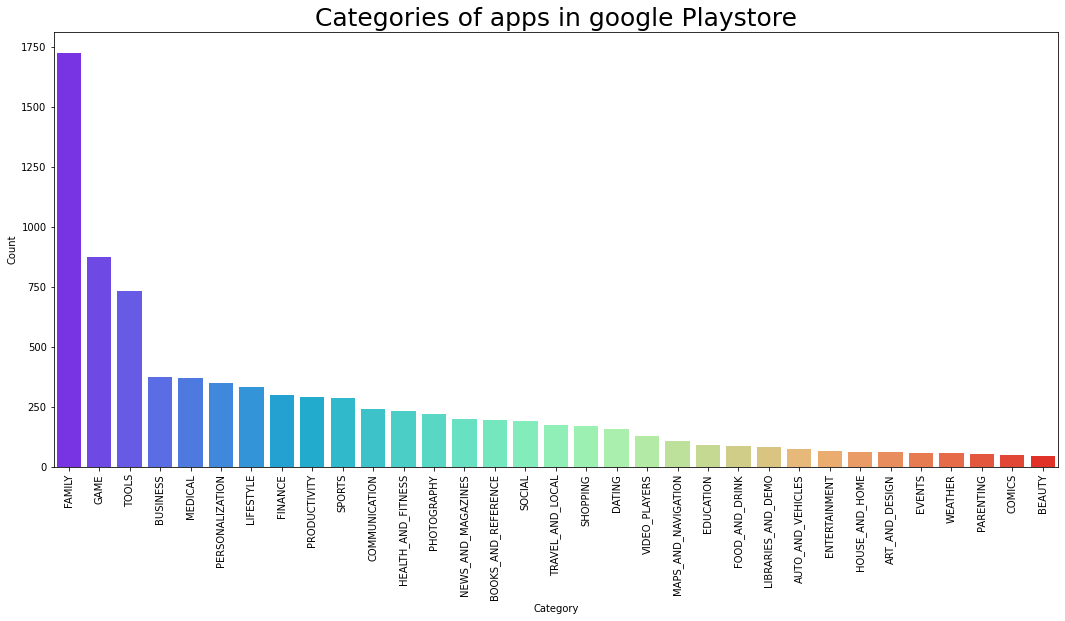

In [ ]:
# Plotting graph/visuals for the same
plt.figure(figsize=(18,8))
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
category_graph = sns.barplot(x = xaxis, y = yaxis, palette= "rainbow")
category_graph.set_title("Categories of apps in google Playstore", fontsize = 25);

# ***Categorical analysis of playstore data reveals that most of the apps are under family category and least number of apps are in beauty category.***

## **Distribution Of Rating**

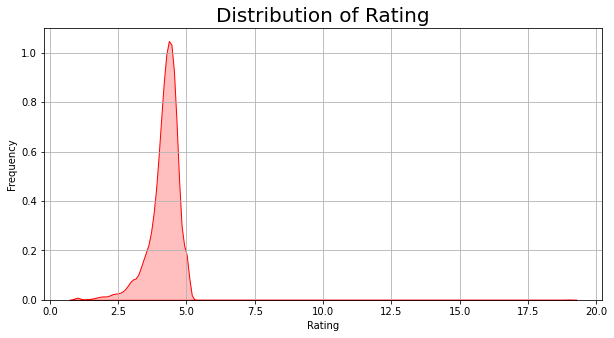

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel("Rating")
plt.ylabel("Frequency")
# plt.xticks(range(1, 6))
plt.grid()
rating_distribution_graph = sns.kdeplot(play_store.Rating, color="red", shade = True)
plt.title('Distribution of Rating',size = 20);

# ***The above graph shows that most of the apps have ratings between 3 to 5.***

## **Category With Highest Number Of Installations**

In [149]:
# defining x
x = play_store.groupby('Category')['Installs'].agg(np.sum)

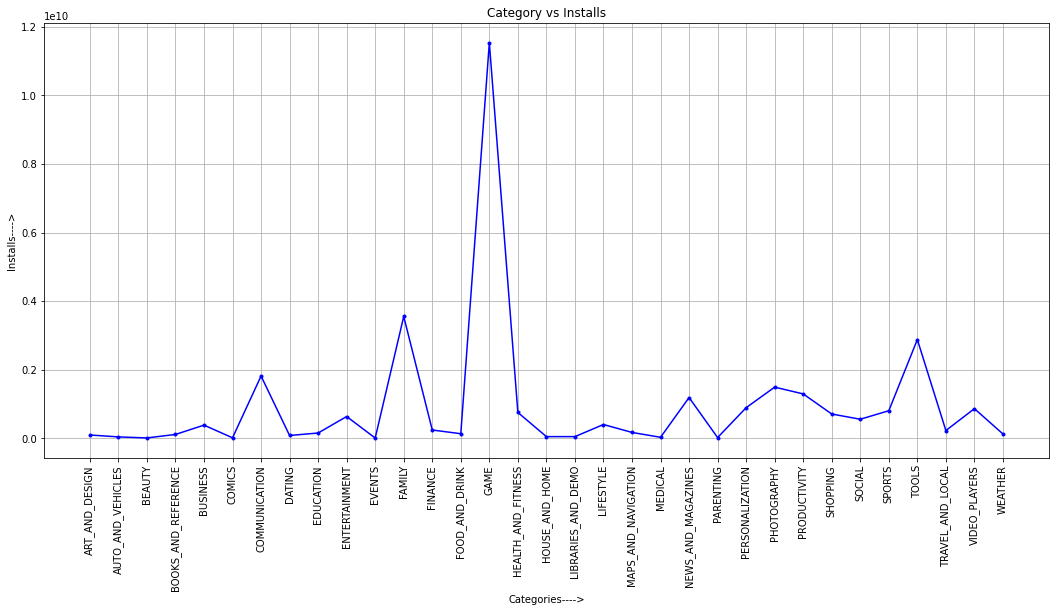

In [151]:
# plotting line graph to determine category highest installations
plt.figure(figsize=(18,8))
plt.plot(x ,  color='blue', marker='.')
plt.xticks(rotation=90)
plt.xlabel('Categories---->')
plt.ylabel('Installs---->')
plt.title('Category vs Installs')
plt.grid()
plt.show()

# ***Graph clearly shows that apps in game category have been installed the highest followed by apps in family category and then apps in travel and local.*** 

## **Average Size of categories present in play store data**





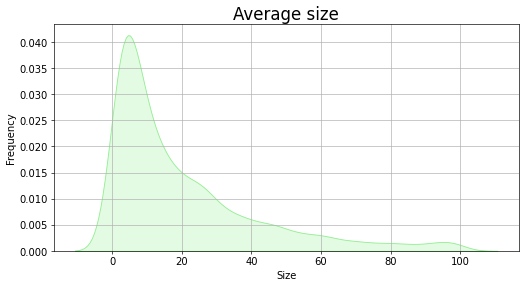

In [162]:
# Plotting a line graph to determine size distribution
plt.figure(figsize=(10,5))
plt.xlabel("Size")
plt.ylabel("Frequency")
plt.grid()
size_distribution_graph = sns.kdeplot(play_store.Size, color="lightgreen", shade = True)
plt.title('Average size',size = 20);


#***Average size of categories is between  0 to 15 MB.***

## **Categories Of Type-'Free' And 'Paid'**

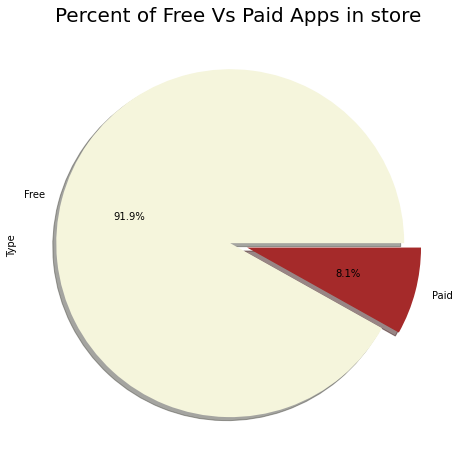

In [ ]:
play_store['Type'].value_counts().plot.pie(explode=[0.05, 0.05],colors=["beige","brown"], autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

# ***This visual interprets that 91.9% of the apps are free and 8.1% of the apps are paid.***

## **Apps With Highest Ratings**

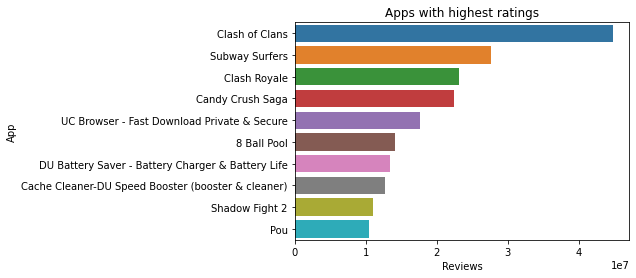

In [ ]:
Apps_and_reviews= play_store.groupby('App')[['Reviews']].mean().sort_values('Reviews', ascending=False).head(10).reset_index()
sns.barplot(y = Apps_and_reviews['App'], x = Apps_and_reviews['Reviews'])
plt.title('Apps with highest ratings')
plt.show()

# ***Above data uses all apps from game category and shows which app has the highest rating. This interprets that clash of clans has the highest rating (>4.5).***

## **Visuals Based On Content Rating**

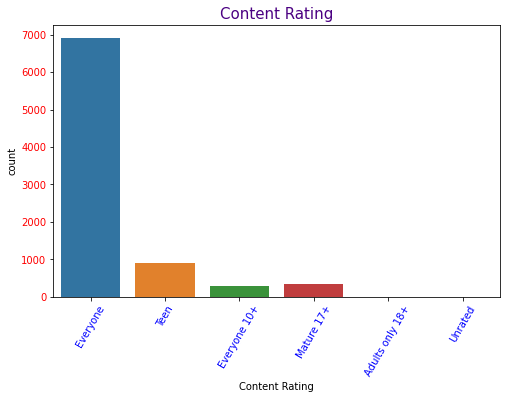

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=play_store, x='Content Rating')
plt.xticks(rotation=60, color= 'blue')
plt.yticks(color='red')
plt.title('Content Rating',color = 'indigo',fontsize=15)
plt.show()

# ***Highest number of installed applications content rating is everyone.***


#**Data Visualization Of User Review Data**

## **Now we will be interpreting type of review from sentiment column of user review data**

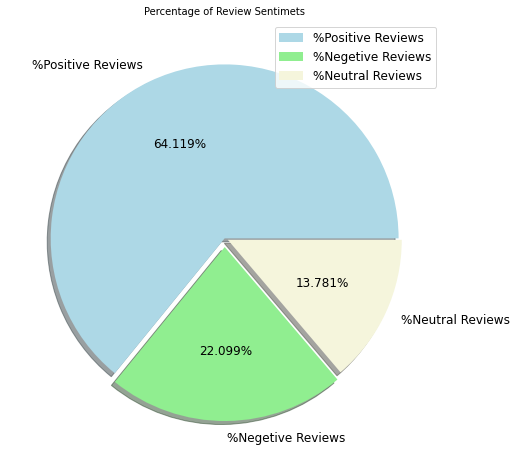

In [157]:
sentiment_value_count = list(user_review['Sentiment'].value_counts())
labels = '%Positive Reviews', '%Negetive Reviews','%Neutral Reviews'
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 12
plt.title('Percentage of Review Sentimets', fontsize=10)
plt.pie(sentiment_value_count, colors=["lightblue","lightgreen","beige"], labels=labels, explode=[0, 0.05, 0.02], shadow= True, autopct="%.3f%%")
plt.legend()
plt.axis('off')
plt.show()

# ***This chart interprets that most of the reviews are positive.***

## **Proportionality of sentiment subjectivity to sentiment polarity**

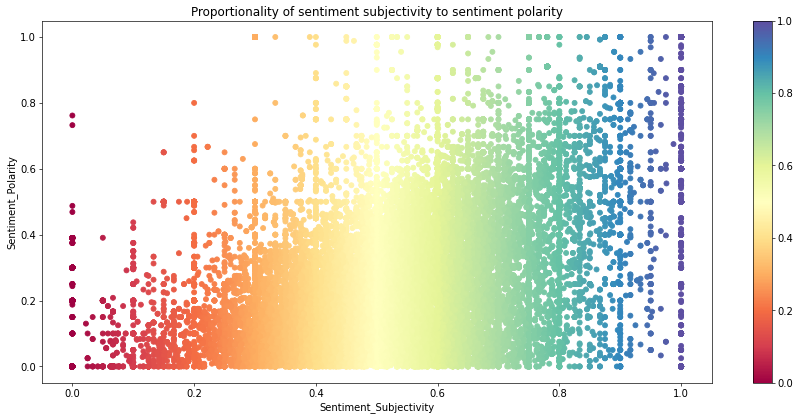

In [160]:
user_review['Sentiment_Subjectivity1'] = user_review['Sentiment_Subjectivity'].abs()
user_review['Sentiment_Polarity1'] = user_review['Sentiment_Polarity'].abs()
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':60})
plt.scatter( user_review['Sentiment_Subjectivity1'],user_review['Sentiment_Polarity1'], c=user_review['Sentiment_Subjectivity1'], cmap='Spectral')
plt.colorbar()
plt.title("Proportionality of sentiment subjectivity to sentiment polarity")
plt.xlabel('Sentiment_Subjectivity')
plt.ylabel('Sentiment_Polarity')
plt.show()